In [2]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from scipy import sparse

$$
\frac{\hbar}{2m}\left(\frac{\partial^2\psi}{\partial x^2} +\frac{\partial^2\psi}{\partial y^2} \ \right) + V(x,y)\psi(x,y) = 
E\psi(x,y)
$$

In [4]:
N = 150
X, Y = np.meshgrid(np.linspace(0,1,N,dtype=float),
                   np.linspace(0,1,N,dtype=float))


In [5]:
def getpot(x,y):
    return 0*x

V = getpot(X,Y)

In [6]:
diag = np.ones([N])
diags = np.array([diag,-2*diag,diag])

D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)

T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T + U

In [7]:
eigenvalues , eigenvectors = eigsh(H, k=10, which='SM')

In [8]:
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

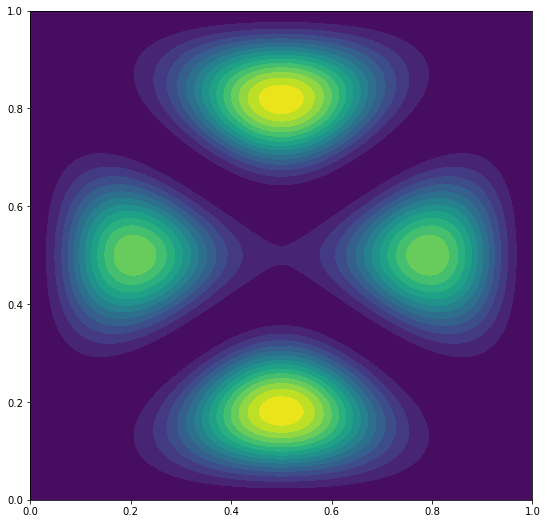

In [9]:
plt.figure(figsize=(9,9))
plt.contourf(X,Y,get_e(5)**2,20)

C:\Users\blueb\AppData\Local\Temp\ipykernel_29860\4145573013.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


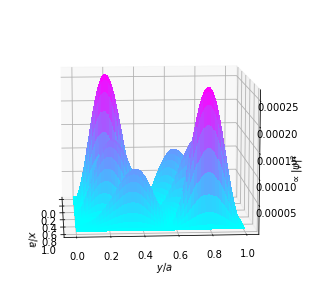

In [10]:
my_cmap = plt.get_cmap('cool')
def init():
    ax.plot_surface(X,Y, get_e(7)**2, cmap=my_cmap,
                    linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    ax.set_zlabel('$\propto|\psi|^2$')
    return fig,

def animate(i):
    ax.view_init(elev=10,azim=4*i)
    return fig,

fig = plt.figure()
ax = Axes3D(fig)
ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=90,interval=50)
ani.save('rotate_azimuth_angle_3d_surf.gif',writer='pillow',fps=20)


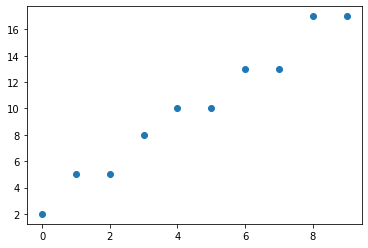

In [69]:
alpha = eigenvalues[0]/2
E_div_alpha = eigenvalues/alpha
_ = np.arange(0,len(eigenvalues),1)
plt.scatter(_,E_div_alpha)